In [1]:
import os
import pandas as pd

read_path = os.getcwd()
df_url = read_path + '/Output/GoldDataframe.csv'

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
#One dataframe per country

df = pd.read_csv(df_url)
corr_df = pd.DataFrame()
corr_df.index.names = ['Country']
aux_df = pd.DataFrame()

#List all the countries, none repeated
countries = set(df['Country'].to_list())

country_dict = {}
corr_dict = {}

for country in countries:

    #Get the DataFrame for a given country
    country_df = df.loc[df['Country'] == country]

    #Correlation matrix for that country
    country_corr_df = country_df.corr()

    #Trim it into a single row
    country_corr_df = country_corr_df.rename(columns = {'GDP': country}).drop(index = ['Year', 'GDP'])

    #Add the row to a new DataFrame with the correlations for each country
    corr_df = pd.concat([corr_df, country_corr_df[country]], axis = 1)

#Transpose the resulting DataFrame to have the desired format and show it
corr_df = corr_df.transpose()
corr_df

#corr_df.to_csv(read_path + '/Output/corr.csv')


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Saint Lucia,-0.843703,-0.909062,NaN,0.796964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.522356,-0.545707,NaN,NaN,NaN,0.957435
Central African Republic,-0.650892,NaN,NaN,NaN,0.363069,-0.718428,-0.729975,NaN,0.706032,-0.840461,...,-0.586808,-0.684527,-0.749410,0.037410,-0.813613,0.195268,NaN,NaN,NaN,0.874887
Netherlands,-0.927920,NaN,0.431737,0.920992,-0.839269,-0.848647,-0.380434,-0.775874,0.878462,-0.885008,...,-0.350150,-0.866347,-0.446415,-0.274502,0.751672,-0.796055,0.650675,-0.638777,0.621271,0.853087
Lebanon,-0.503101,NaN,NaN,0.891247,-0.939681,-0.122113,0.062329,NaN,0.888425,0.146781,...,-0.145843,-0.985057,0.890831,0.634427,0.896726,0.899102,NaN,NaN,NaN,0.958025
Gambia,-0.504079,-0.353336,NaN,0.802629,-0.473571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.616920,0.633201,-0.530365,0.423461,0.592211,NaN,NaN,0.799523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,NaN,NaN,NaN,0.949529,-0.860912,-0.362204,0.776483,-0.927046,0.982323,-0.868190,...,-0.550435,-0.983006,-0.713696,-0.956523,0.825297,0.767233,NaN,NaN,NaN,0.982877
Papua New Guinea,-0.906233,-0.885916,NaN,NaN,-0.352091,-0.976067,-0.970016,NaN,0.971378,-0.934638,...,-0.555830,0.134850,-0.782727,-0.603665,-0.398776,0.968018,NaN,NaN,NaN,0.968027
Mauritania,-0.696230,NaN,NaN,NaN,-0.946624,-0.886282,-0.938461,NaN,0.935888,-0.904177,...,0.361595,-0.955581,-0.351195,0.341876,0.896664,0.896081,NaN,NaN,NaN,0.938437
Pakistan,-0.356437,-0.793540,NaN,0.945026,-0.982538,-0.938940,-0.972257,-0.547593,0.978489,-0.961854,...,-0.937689,-0.964911,0.091345,-0.283386,-0.155086,-0.065887,NaN,NaN,NaN,0.965314


In [4]:
#Clean the data deleting rows or columns with too many missing values
clean_corr_df = corr_df

#Indicators with no correlations
clean_corr_df = corr_df.dropna(axis = 'columns', how = 'all')
clean_corr_df

#clean_corr_df = clean_corr_df.dropna(axis = 'rows', thresh = 10)

cols = set(corr_df.columns) - set(clean_corr_df.columns)
print(cols)
clean_corr_df

set()


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Saint Lucia,-0.843703,-0.909062,NaN,0.796964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.522356,-0.545707,NaN,NaN,NaN,0.957435
Central African Republic,-0.650892,NaN,NaN,NaN,0.363069,-0.718428,-0.729975,NaN,0.706032,-0.840461,...,-0.586808,-0.684527,-0.749410,0.037410,-0.813613,0.195268,NaN,NaN,NaN,0.874887
Netherlands,-0.927920,NaN,0.431737,0.920992,-0.839269,-0.848647,-0.380434,-0.775874,0.878462,-0.885008,...,-0.350150,-0.866347,-0.446415,-0.274502,0.751672,-0.796055,0.650675,-0.638777,0.621271,0.853087
Lebanon,-0.503101,NaN,NaN,0.891247,-0.939681,-0.122113,0.062329,NaN,0.888425,0.146781,...,-0.145843,-0.985057,0.890831,0.634427,0.896726,0.899102,NaN,NaN,NaN,0.958025
Gambia,-0.504079,-0.353336,NaN,0.802629,-0.473571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.616920,0.633201,-0.530365,0.423461,0.592211,NaN,NaN,0.799523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,NaN,NaN,NaN,0.949529,-0.860912,-0.362204,0.776483,-0.927046,0.982323,-0.868190,...,-0.550435,-0.983006,-0.713696,-0.956523,0.825297,0.767233,NaN,NaN,NaN,0.982877
Papua New Guinea,-0.906233,-0.885916,NaN,NaN,-0.352091,-0.976067,-0.970016,NaN,0.971378,-0.934638,...,-0.555830,0.134850,-0.782727,-0.603665,-0.398776,0.968018,NaN,NaN,NaN,0.968027
Mauritania,-0.696230,NaN,NaN,NaN,-0.946624,-0.886282,-0.938461,NaN,0.935888,-0.904177,...,0.361595,-0.955581,-0.351195,0.341876,0.896664,0.896081,NaN,NaN,NaN,0.938437
Pakistan,-0.356437,-0.793540,NaN,0.945026,-0.982538,-0.938940,-0.972257,-0.547593,0.978489,-0.961854,...,-0.937689,-0.964911,0.091345,-0.283386,-0.155086,-0.065887,NaN,NaN,NaN,0.965314


In [5]:
#Countries still with not enough indicators
#How many countries would remain depending on the threshold we use for indicators?

dict_count = {}

n_indicators = len(clean_corr_df.columns)

for i in range(0, n_indicators + 1):
    dict_count[i] = 0

for country in clean_corr_df.index:
    count = clean_corr_df.loc[country].count()
    dict_count[count] += 1

dict_count

i = n_indicators - 1
while i >= 0:
    dict_count[i] += dict_count[i + 1]
    i -= 1
dict_count

min = max(dict_count.values()) * 0.8
for i in range(1, len(dict_count)):
    if dict_count[i] < min:
        threshold = dict_count[i]
        break
    i += i


#print(len(dict_count))
print(min)
print(i)
print(threshold)

143.20000000000002
14
139


In [6]:
#What countries would be deleted?
df_count = pd.DataFrame()
print(df_count)
for country in corr_df.index:
    count = corr_df.loc[country].count()
    country_series = pd.Series({'Country': country, 'Indicators': count})
    df_count = pd.concat([df_count, country_series], axis = 1, ignore_index = True)
    #df_count = df_count.append({'Country': country, 'Indicators': count}, ignore_index = True)

df_count = df_count.transpose()
print(df_count)

print(list(df_count['Country']))

import plotly.express as px

fig = px.choropleth(df_count, locations="Country", locationmode='country names', 
                     color="Indicators", hover_name="Country",projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True)

fig.show()

#grp = cases.groupby(['Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].max()
#grp = grp.reset_index()
#grp['Country'] = grp['Country/Region']
""" 
fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True) """

Empty DataFrame
Columns: []
Index: []
                      Country Indicators
0                 Saint Lucia          6
1    Central African Republic         14
2                 Netherlands         20
3                     Lebanon         15
4                      Gambia         10
..                        ...        ...
174                     China         15
175          Papua New Guinea         15
176                Mauritania         14
177                  Pakistan         17
178                Kazakhstan         15

[179 rows x 2 columns]
['Saint Lucia', 'Central African Republic', 'Netherlands', 'Lebanon', 'Gambia', 'Uganda', 'Myanmar', 'Denmark', 'Vanuatu', 'Latvia', 'Eritrea', 'South Africa', 'North Macedonia', 'Dominican Republic', 'Palau', 'United Kingdom', 'Andorra', 'Serbia', 'Spain', 'Hungary', 'Sierra Leone', 'Comoros', 'Costa Rica', 'Kenya', 'Canada', 'Malawi', 'Thailand', 'Seychelles', 'Estonia', 'Iceland', 'Philippines', 'Kyrgyzstan', 'Poland', 'Tuvalu', 'Burkina F

' \nfig = px.choropleth(grp, locations="Country", locationmode=\'country names\', \n                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",\n                     color_continuous_scale=\'Reds\',\n                 width=700, height=500)\nfig.update(layout_coloraxis_showscale=True) '

In [7]:
""" #corr_dict = {}

cor=country_dict['Spain'].corr()['GDP'].to_list()
print(cor)
#Correlations and all """



" #corr_dict = {}\n\ncor=country_dict['Spain'].corr()['GDP'].to_list()\nprint(cor)\n#Correlations and all "

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [9]:
""" print(corr_df)
country_col = corr_df['Country']
corr_df = df.iloc[:, :-1] """

" print(corr_df)\ncountry_col = corr_df['Country']\ncorr_df = df.iloc[:, :-1] "

In [10]:
#print(corr_df)
country_col = corr_df.index
print(country_col)
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
#print(df_scaled)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.index.names = corr_df.index.names
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)
print(df_normalized)

Index(['Saint Lucia', 'Central African Republic', 'Netherlands', 'Lebanon',
       'Gambia', 'Uganda', 'Myanmar', 'Denmark', 'Vanuatu', 'Latvia',
       ...
       'Croatia', 'Ukraine', 'Malta', 'Chile', 'Israel', 'China',
       'Papua New Guinea', 'Mauritania', 'Pakistan', 'Kazakhstan'],
      dtype='object', length=179)
     AgriShareGDP  CreditToAgriFishForest  EmploymentRural  TotalAgri  \
0       -0.124515               -0.267890         0.050465  -0.031174   
1       -0.080309               -0.413174         0.077833  -0.048080   
2       -0.263792               -0.452539         0.306302   0.115673   
3        0.004248               -0.328998         0.222683   0.054745   
4        0.004454               -0.145193         0.261190  -0.038348   
..            ...                     ...              ...        ...   
174     -0.124751               -0.123234        -0.046174   0.114317   
175     -0.174892               -0.308325        -0.043625   0.108004   
176     -0.090824 

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components = 2, perplexity = 3, n_iter = 1000, learning_rate = 200.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(country_col).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)

print(new_df_tsne)



c:\Users\vperezlo\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



                         1st_component 2nd_component
Country                                             
Saint Lucia                 -45.157738    -44.918621
Central African Republic     43.264389     38.574722
Netherlands                  39.312065     23.359251
Lebanon                     -28.064421     -17.24407
Gambia                       -29.25889    -17.496508
...                                ...           ...
China                        38.558578     -2.364691
Papua New Guinea             16.296537      6.850591
Mauritania                   30.920723     -3.159815
Pakistan                     18.879086      6.667736
Kazakhstan                    3.964804      7.711847

[179 rows x 2 columns]


In [12]:
read_path = os.getcwd()
region_url = read_path + '/Databases/AuxiliarData/world-regions.csv'

column_region = 'Region'
column_country = 'Country'

region_df = pd.read_csv(region_url)
region_df.drop(columns=['Code', 'Year'], inplace = True)
region_df.rename(columns = {'World Region according to the World Bank': column_region, 'Entity': column_country}, inplace = True)
region_df.set_index(['Country', 'Region'], inplace = True)

display(new_df_tsne)

print(df.loc[df['Year'] == 2020].set_index('Country')['Population'])

new_df_tsne = pd.concat([new_df_tsne, df.loc[df['Year'] == 2020].set_index('Country')['Population']], axis = 1)
new_df_tsne = pd.merge(new_df_tsne, region_df, how = 'inner', left_index = True, right_index = True)

new_df_tsne

,1st_component,2nd_component
Country,,
Saint Lucia,-45.157738,-44.918621
Central African Republic,43.264389,38.574722
Netherlands,39.312065,23.359251
Lebanon,-28.064421,-17.24407
Gambia,-29.25889,-17.496508
...,...,...
China,38.558578,-2.364691
Papua New Guinea,16.296537,6.850591
Mauritania,30.920723,-3.159815


Country
Afghanistan    38928341.0
Albania         2877800.0
Algeria        43851043.0
Andorra           77265.0
Angola         32866267.0
                  ...    
Uzbekistan     33469199.0
Vanuatu          307150.0
Yemen          29825968.0
Zambia         18383956.0
Zimbabwe       14862927.0
Name: Population, Length: 179, dtype: float64


,,1st_component,2nd_component,Population
Country,Region,,,
Afghanistan,South Asia,13.720913,33.481293,38928341.0
Albania,Europe and Central Asia,7.048238,-20.218336,2877800.0
Algeria,Middle East and North Africa,-26.082878,-16.944063,43851043.0
Andorra,Europe and Central Asia,-14.247145,-44.178051,77265.0
Angola,Sub-Saharan Africa,-17.790813,15.737306,32866267.0
...,...,...,...,...
Uzbekistan,Europe and Central Asia,-29.112188,52.844772,33469199.0
Vanuatu,East Asia and Pacific,-33.788872,33.814167,307150.0
Yemen,Middle East and North Africa,47.354507,17.299389,29825968.0


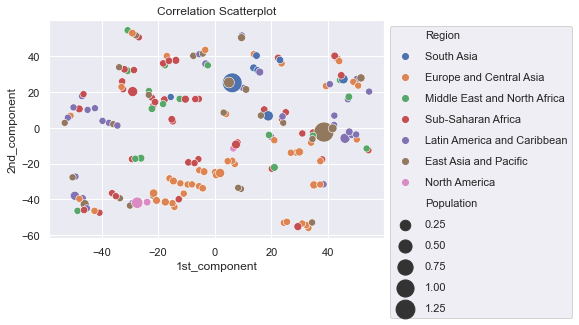

In [13]:
sns.set(rc={'figure.figsize':(7.5, 7.5)})

sns.scatterplot(data = new_df_tsne, x = '1st_component', y = '2nd_component', markers = 'Region', hue = 'Region', size = 'Population', sizes = (50, 400))

plt.legend(bbox_to_anchor=(1, 1), labelspacing = 1, loc=2)
plt.title('Correlation Scatterplot')
plt.show()

In [14]:
def group(row):
    list_c = ['Spain', 'China', 'Netherlands']

    if row.name in list_c:
        return 'Nope'
    else:
        return 'Yes'

In [15]:
test_df = new_df_tsne.copy()
#print(test_df.apply(lambda row: group(row), axis=1))
test_df['In list?'] = df.apply(lambda row: group(row), axis=1).convert_dtypes()

test_df

,,1st_component,2nd_component,Population,In list?
Country,Region,,,,
Afghanistan,South Asia,13.720913,33.481293,38928341.0,<NA>
Albania,Europe and Central Asia,7.048238,-20.218336,2877800.0,<NA>
Algeria,Middle East and North Africa,-26.082878,-16.944063,43851043.0,<NA>
Andorra,Europe and Central Asia,-14.247145,-44.178051,77265.0,<NA>
Angola,Sub-Saharan Africa,-17.790813,15.737306,32866267.0,<NA>
...,...,...,...,...,...
Uzbekistan,Europe and Central Asia,-29.112188,52.844772,33469199.0,<NA>
Vanuatu,East Asia and Pacific,-33.788872,33.814167,307150.0,<NA>
Yemen,Middle East and North Africa,47.354507,17.299389,29825968.0,<NA>


In [16]:
test_df = new_df_tsne.copy()

list_c = ['Spain', 'China', 'Netherlands']

conditions = [
  np.logical_and(test_df['1st_component'].gt(0), test_df['2nd_component'].gt(0))
]

outputs = ['Yes']

col = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str, name = 'col')
#print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str))
print(pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

test_df['col'] = (pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes())

#test_df = pd.concat([test_df, col], axis = 1, ignore_index = True)

#test_df['col'] = pd.Series(np.select(conditions, outputs, 'Nope'), dtype = str).convert_dtypes()
#test_df.join(col)
test_df

0       Yes
1      Nope
2      Nope
3      Nope
4      Nope
       ... 
174    Nope
175    Nope
176     Yes
177    Nope
178    Nope
Length: 179, dtype: string


,,1st_component,2nd_component,Population,col
Country,Region,,,,
Afghanistan,South Asia,13.720913,33.481293,38928341.0,<NA>
Albania,Europe and Central Asia,7.048238,-20.218336,2877800.0,<NA>
Algeria,Middle East and North Africa,-26.082878,-16.944063,43851043.0,<NA>
Andorra,Europe and Central Asia,-14.247145,-44.178051,77265.0,<NA>
Angola,Sub-Saharan Africa,-17.790813,15.737306,32866267.0,<NA>
...,...,...,...,...,...
Uzbekistan,Europe and Central Asia,-29.112188,52.844772,33469199.0,<NA>
Vanuatu,East Asia and Pacific,-33.788872,33.814167,307150.0,<NA>
Yemen,Middle East and North Africa,47.354507,17.299389,29825968.0,<NA>


[ 0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
179


Text(0.5, 1.0, 'OPTICS Clustering')

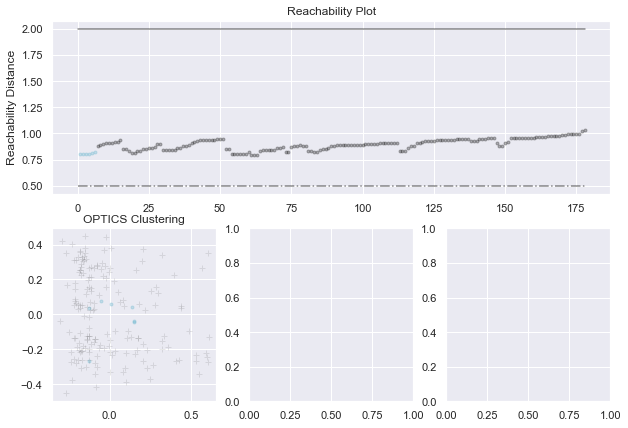

In [17]:


optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 5)
optics_model.fit(df_normalized)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

space = np.arange(len(df_normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]
print(labels)
print(len(labels))

plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = df_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(df_normalized.iloc[optics_model.labels_ == -1, 0],
        df_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  

In [18]:
""" #MORRALLA

# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target


fig = plt.figure(figsize=(10,10))
plt = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],X[:,2], 
            c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
plt.set_title("First three PCA directions")
plt.set_xlabel("Educational_Degree")
plt.set_ylabel("Gross_Monthly_Salary")
plt.set_zlabel("Claim_Rate")
plt.dist = 10
plt

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = KMeans()
res = model.fit_predict(df)

 """

' #MORRALLA\n\n# K-MEANS CLUSTERING\n# Importing Modules\nfrom sklearn import datasets\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n# Loading dataset\niris_df = datasets.load_iris()\n\n# Declaring Model\nmodel = KMeans(n_clusters=3)\n\n# Fitting Model\nmodel.fit(iris_df.data)\n\n# Predicitng a single input\npredicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])\n\n# Prediction on the entire data\nall_predictions = model.predict(iris_df.data)\n\n# Printing Predictions\nprint(predicted_label)\nprint(all_predictions)\n\n\n# import some data to play with\niris = datasets.load_iris()\nX = iris.data[:, :3]  # we only take the first two features.\ny = iris.target\n\n\nfig = plt.figure(figsize=(10,10))\nplt = fig.add_subplot(111, projection=\'3d\')\nplt.scatter(X[:,0],X[:,1],X[:,2], \n            c=all_predictions, edgecolor=\'red\', s=40, alpha = 0.5)\nplt.set_title("First three PCA directions")\nplt.set_xlabel("Educational_Degr